# **Statistical Analysis of NASA Dataset**

**Now that we have done EDA, we are now capable of doing the appropriate statistical analysis to draw the necessary conclusions from the dataset**

### **Statistical Measures we can perform**

1.   Descriptive Analysis
2.   Hypothesis Testing
3.   Correlation Analysis
4.   Regression Modelling / Classification Model





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,15)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/P&S/P&S Assignment Material /Neo 1.xlsx'

data = pd.read_excel(path)
data.sample(10)

,Name,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,mean_esitmated_diameter(Km),orbit_class_type,perihelion_distance,aphelion_distance,first_observation_year,last_observation_year
18993,VK5,23.5,False,False,0.053034,0.118588,0.085811,APO,0.972674,2.788580,2018,2019
2371,,19.1,True,False,0.402305,0.899580,0.650942,APO,0.624250,4.069567,1994,2017
18068,HL2,21.3,True,False,0.146068,0.326618,0.236343,APO,0.889500,2.452635,2018,2020
13858,DP2,25.9,False,False,0.017561,0.039268,0.028415,ATE,0.610036,1.106515,2016,2016
13075,TG24,26.7,False,True,0.012149,0.027167,0.019658,ATE,0.415346,1.077353,2015,2015
22084,CF),27.4,False,False,0.008801,0.019681,0.014241,APO,1.008027,1.853530,2020,2020
16224,MC5,21.3,False,False,0.146068,0.326618,0.236343,AMO,1.117229,3.332502,2017,2017
19507,BM2,26.2,False,False,0.015295,0.034201,0.024748,APO,0.966270,1.556534,2019,2019
3057,TT3,18.8,False,False,0.461907,1.032856,0.747382,AMO,1.154388,3.491206,1998,2017
20426,ND7,21.4,True,False,0.139494,0.311918,0.225706,APO,0.487847,1.807761,2019,2020


In [ ]:
data = data.dropna()
data.isna().sum()

Name                                 0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
mean_esitmated_diameter(Km)          0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_year               0
last_observation_year                0
dtype: int64

## **Inferences to draw from data**






### **Relationship between asteroid size and hazard potential**




*   **Relationship between the orbit class type of asteroids and their likelihood of being classified as potentially hazardous.**

In [ ]:
df_1 = data[['mean_esitmated_diameter(Km)', 'is_potentially_hazardous_asteroid']]
df_1


,mean_esitmated_diameter(Km),is_potentially_hazardous_asteroid
0,3.886356,True
1,2.751330,False
2,2.299019,False
3,1.635094,False
4,1.505021,False
...,...,...
23994,0.017928,False
23995,0.011312,False
23996,0.015615,False
23997,0.014708,False


<ipython-input-7-68a383cc8a80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ln(dia)'] = np.log(df_1['mean_esitmated_diameter(Km)'])


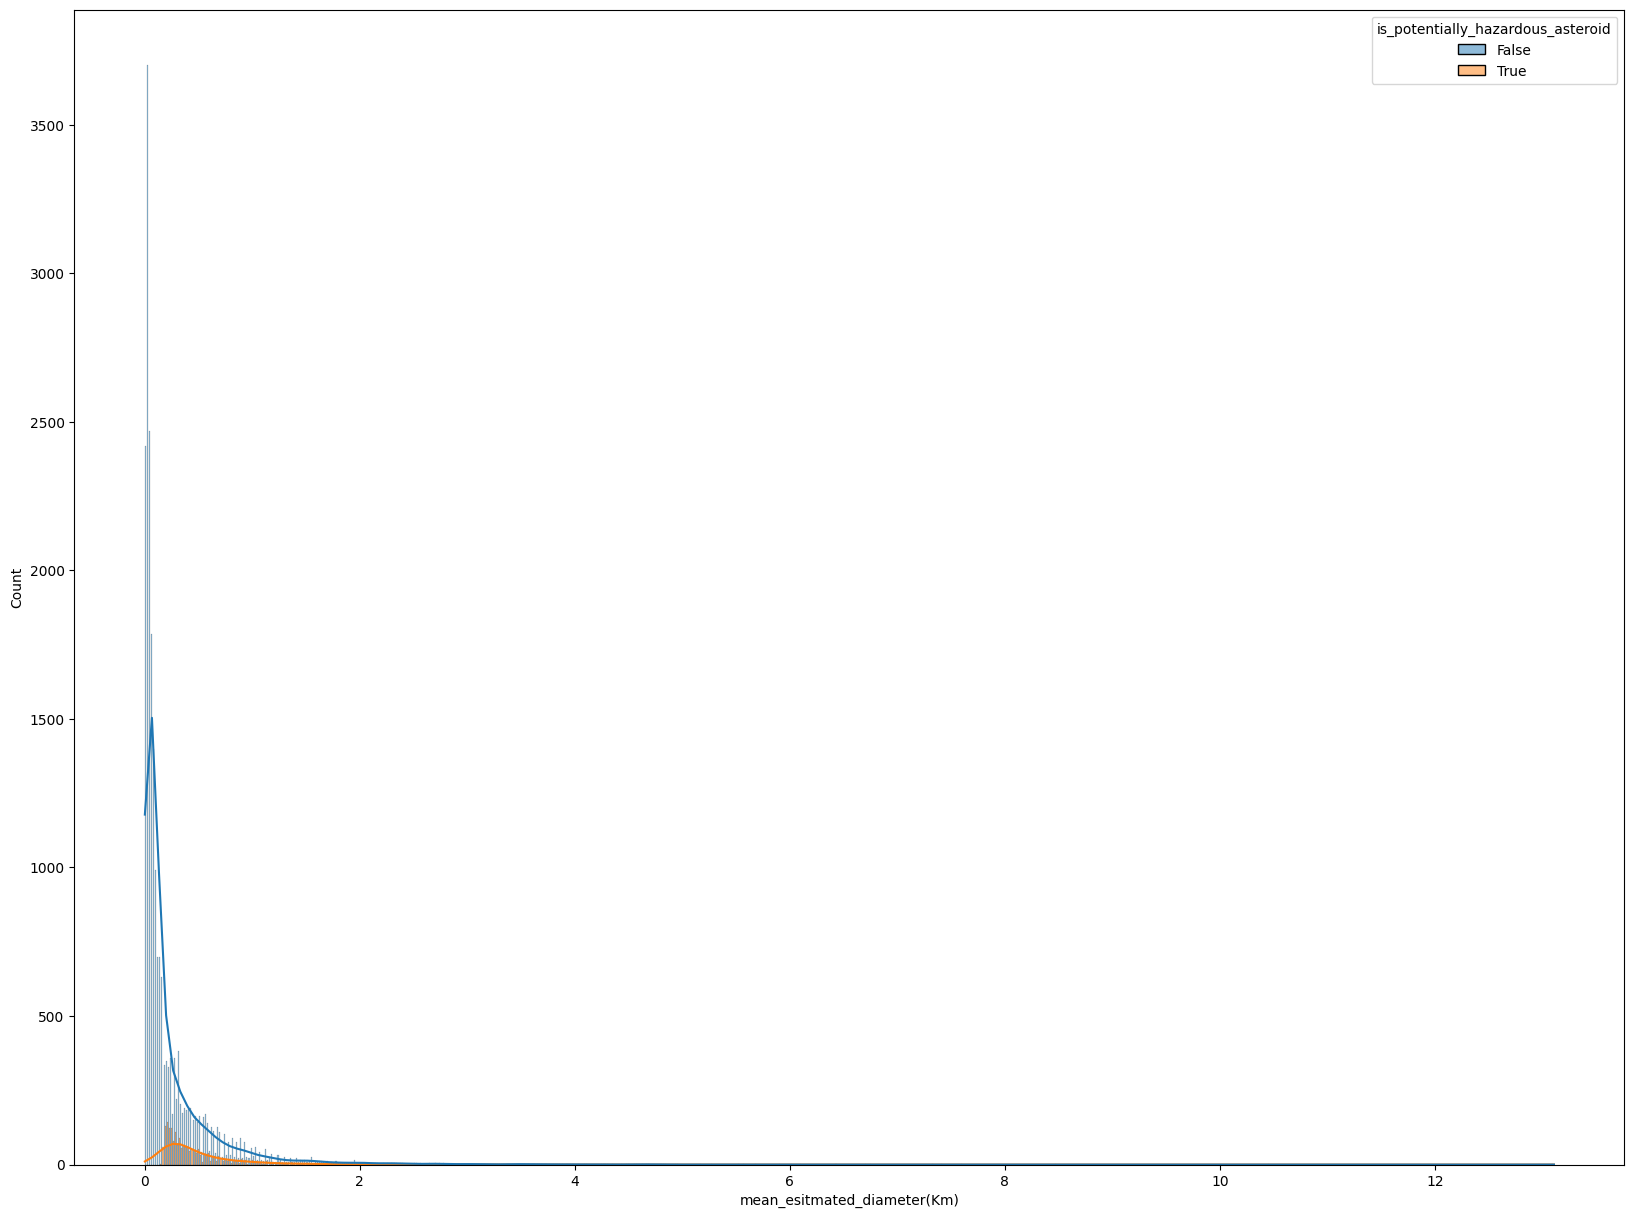

In [ ]:
df_1['ln(dia)'] = np.log(df_1['mean_esitmated_diameter(Km)'])
sb.histplot(data=df_1, x='mean_esitmated_diameter(Km)', hue='is_potentially_hazardous_asteroid', multiple='dodge', kde=True)
plt.show()

In [ ]:
df_1

,mean_esitmated_diameter(Km),is_potentially_hazardous_asteroid,ln(dia)
0,3.886356,True,1.357472
1,2.751330,False,1.012084
2,2.299019,False,0.832483
3,1.635094,False,0.491700
4,1.505021,False,0.408807
...,...,...,...
23994,0.017928,False,-4.021367
23995,0.011312,False,-4.481884
23996,0.015615,False,-4.159522
23997,0.014708,False,-4.219389


In [ ]:
group1 = df_1[df_1['is_potentially_hazardous_asteroid'] == True]
group2 = df_1[df_1['is_potentially_hazardous_asteroid'] == False]
print("Variances of two groups: ")
print("*"*50)
print("Variances of Hazardous Asteroids: ")
print(group1.var()[0])
print("*"*30)
print("Variances Non-Hazardous Asteroids: ")
print(group2.var()[0])
print("*"*50)
print("Mean of Hazardous Asteriods: ")
print(group1.mean()[0])
print("*"*30)
print("Mean of Non-Hazardous Asteriods: ")
print(group2.mean()[0])
print("*"*30)
print("Sample size of Hazardous Asteriods: ")
print(len(group1))
print("*"*30)
print("Sample Size of Non-Hazardous Asteriods: ")
print(len(group2))

print(" ")
print(" ")
print(" ")
group1.columns = ['Estimated Diameter(Km)', 'Hazardous', 'ln(dia)']
group2.columns = ['Estimated Diameter(Km)', 'Hazardous', 'ln(dia)']
group1 = group1.reset_index(drop=True)
group1[["Estimated Diameter(Km)", "Hazardous"]].head(5)


Variances of two groups: 
**************************************************
Variances of Hazardous Asteroids: 
0.30912267311627867
******************************
Variances Non-Hazardous Asteroids: 
0.20921420394615073
**************************************************
Mean of Hazardous Asteriods: 
0.5398864276585285
******************************
Mean of Non-Hazardous Asteriods: 
0.24577621825377555
******************************
Sample size of Hazardous Asteriods: 
2093
******************************
Sample Size of Non-Hazardous Asteriods: 
21891
 
 
 


,Estimated Diameter(Km),Hazardous
0,3.886356,True
1,0.804531,True
2,2.713580,True
3,1.070391,True
4,3.833034,True


*  **Checking for a significant difference of Population means of Hazardous and Non Hazardous Asteroids Sizes**

Using a Two tailed t-test for Un-equal variances, I can deduce if the average diameters of asteroids that are dangerous and those that are not dangerous are signifanctly different or not.

If they are significantly different then that means Asteroid diameter impacts if it is potentially hazardous.

Two Tailed T-test with equal variances

**Null hypothesis**: Equal pop means of both

**Alternate hypothesis**: Mean of Hazardous > Mean of Non Hazardous

**Levene test will tell me whether to use the T-test for equal or unequal variances**

In [ ]:
st.levene(group1['Mean Diameter(Km)'], group2['Mean Diameter(Km)'])

LeveneResult(statistic=67.3677997129425, pvalue=2.3652238150459555e-16)

In [ ]:
st.ttest_ind(group1['Mean Diameter(Km)'], group2['Mean Diameter(Km)'], equal_var=False, alternative='greater')

Ttest_indResult(statistic=23.453833878256255, pvalue=7.183537652779579e-110)

In [ ]:
st.ttest_ind(group1['ln(dia)'], group2['ln(dia)'], equal_var=False, alternative='greater')

Ttest_indResult(statistic=83.82406564897084, pvalue=0.0)

### **Orbital characteristics and asteroid hazard potential**






*   **Relationship between the orbit class type of asteroids and their likelihood of being classified as potentially hazardous.**

In [ ]:
df_2 = data[['orbit_class_type', 'is_potentially_hazardous_asteroid']]
df_2

,orbit_class_type,is_potentially_hazardous_asteroid
0,APO,True
1,AMO,False
2,AMO,False
3,ATE,False
4,APO,False
...,...,...
23994,APO,False
23995,APO,False
23996,APO,False
23997,AMO,False


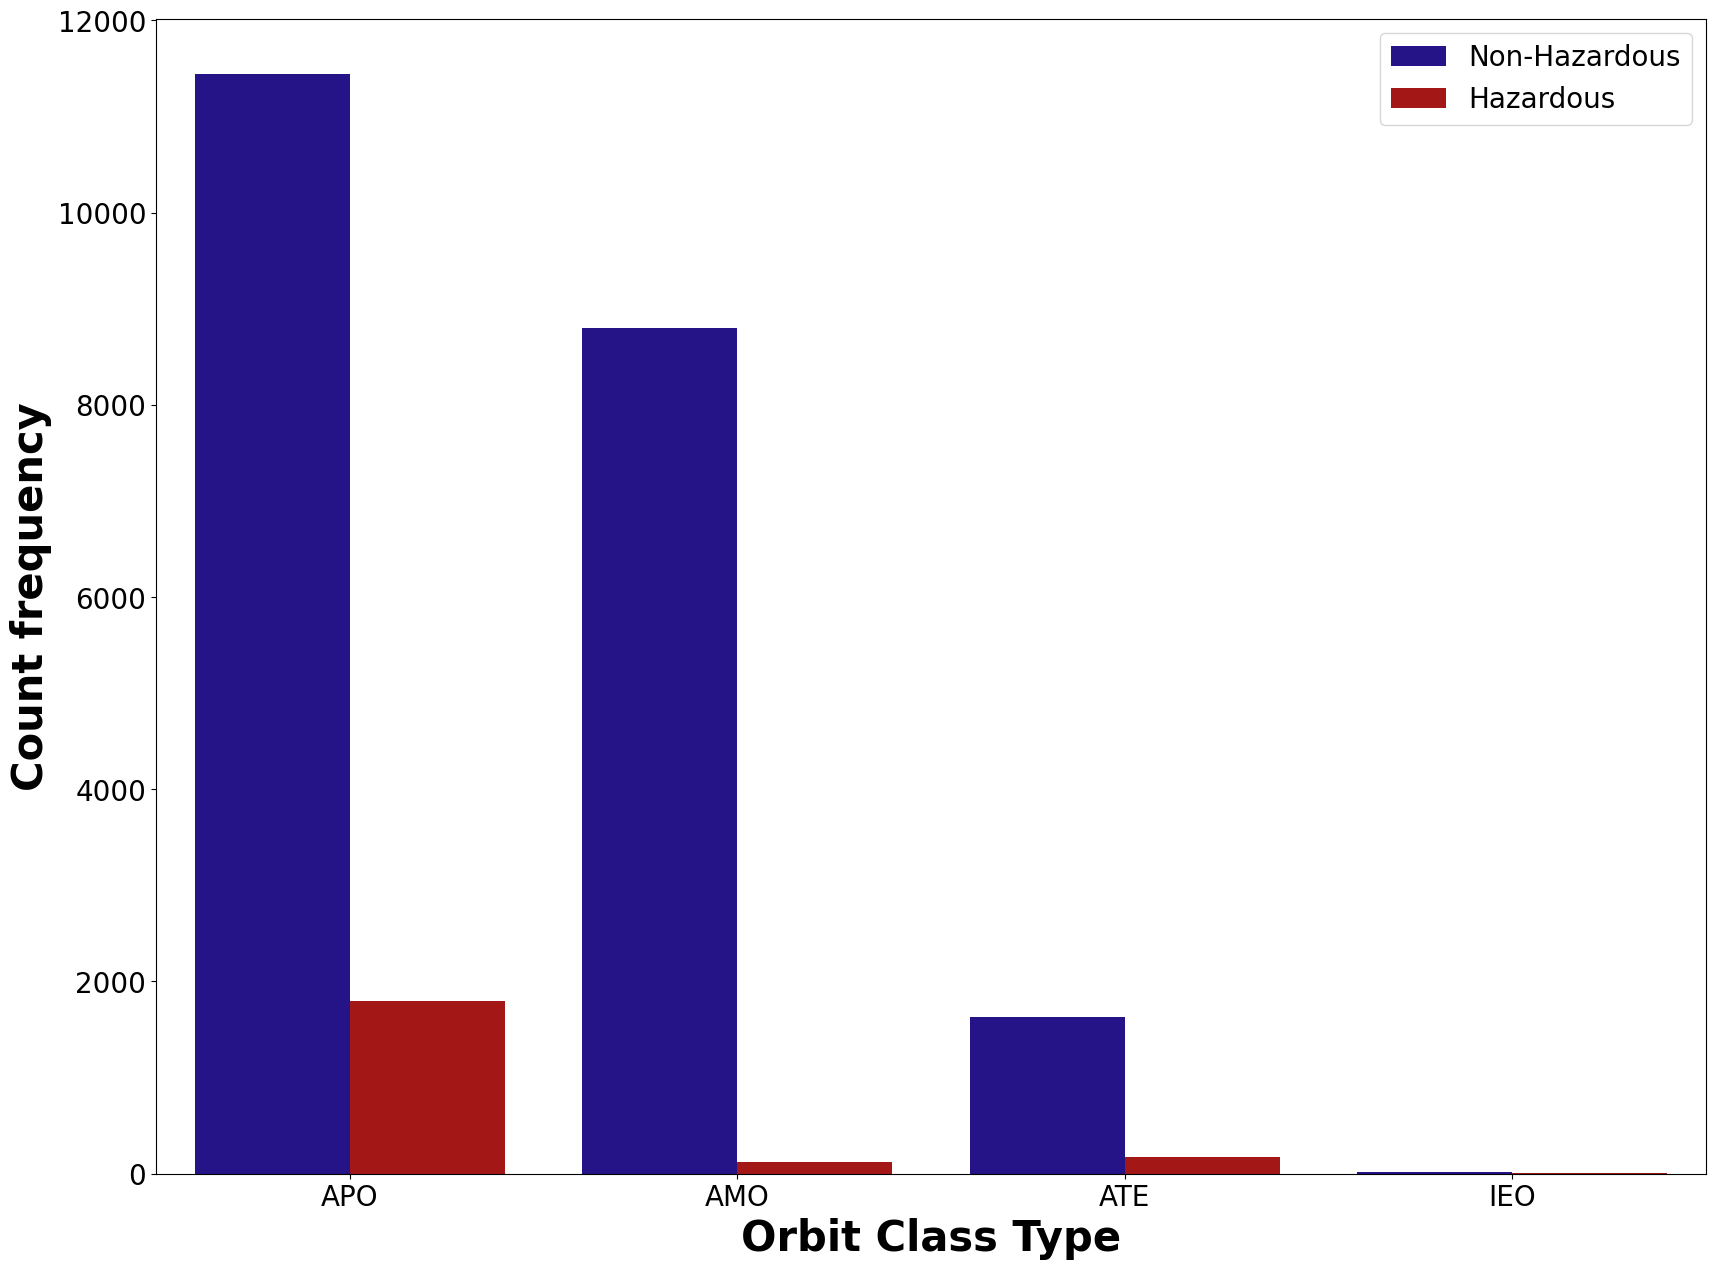

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
sb.countplot(data=df_2, x='orbit_class_type', hue = 'is_potentially_hazardous_asteroid', palette=['#17009B','#BA0000'])
plt.xlabel("Orbit Class Type", fontsize=30, fontweight='bold')
plt.ylabel("Count frequency", fontsize=30, fontweight='bold')
plt.legend(['Non-Hazardous', 'Hazardous'],fontsize=20)
plt.show()

*  **Most of the hazardous asteroids are of the APO Type.**
*  **APO > ATE > AMO > IEO**



**Checking for a significant association between the orbit class and hazard status of near earth asteroids**

Null Hypothesis : There is no significant association between the orbit class and hazard status of near earth asteroids. In other words, the proportion of hazardous asteroids is the same across all orbit classes.

The alternative hypothesis : There is a significant association between the orbit class and hazard status of near earth asteroids. In other words, the proportion of hazardous asteroids varies across different orbit classes.

In [ ]:
cont_table = pd.crosstab(df_2["orbit_class_type"], df_2["is_potentially_hazardous_asteroid"])
cont_table

is_potentially_hazardous_asteroid,False,True
orbit_class_type,,
AMO,8795,118
APO,11445,1794
ATE,1635,175
IEO,16,6


In [ ]:
# Perform the chi-squared test on the contingency table
chi2, p, dof, expected = st.chi2_contingency(cont_table)

print("Chi-Test Statistic: ",chi2,"  p-Value = " ,p,"  Degrees of Freedom(n-1) = ", dof)

Chi-Test Statistic:  1011.5659755358789   p-Value =  5.5732077710303394e-219   Degrees of Freedom(n-1) =  3


In [ ]:
print(expected.astype('int64'))

[[ 8135   777]
 [12083  1155]
 [ 1652   157]
 [   20     1]]


### **Asteroid Orbit class type and their sizes comparision**




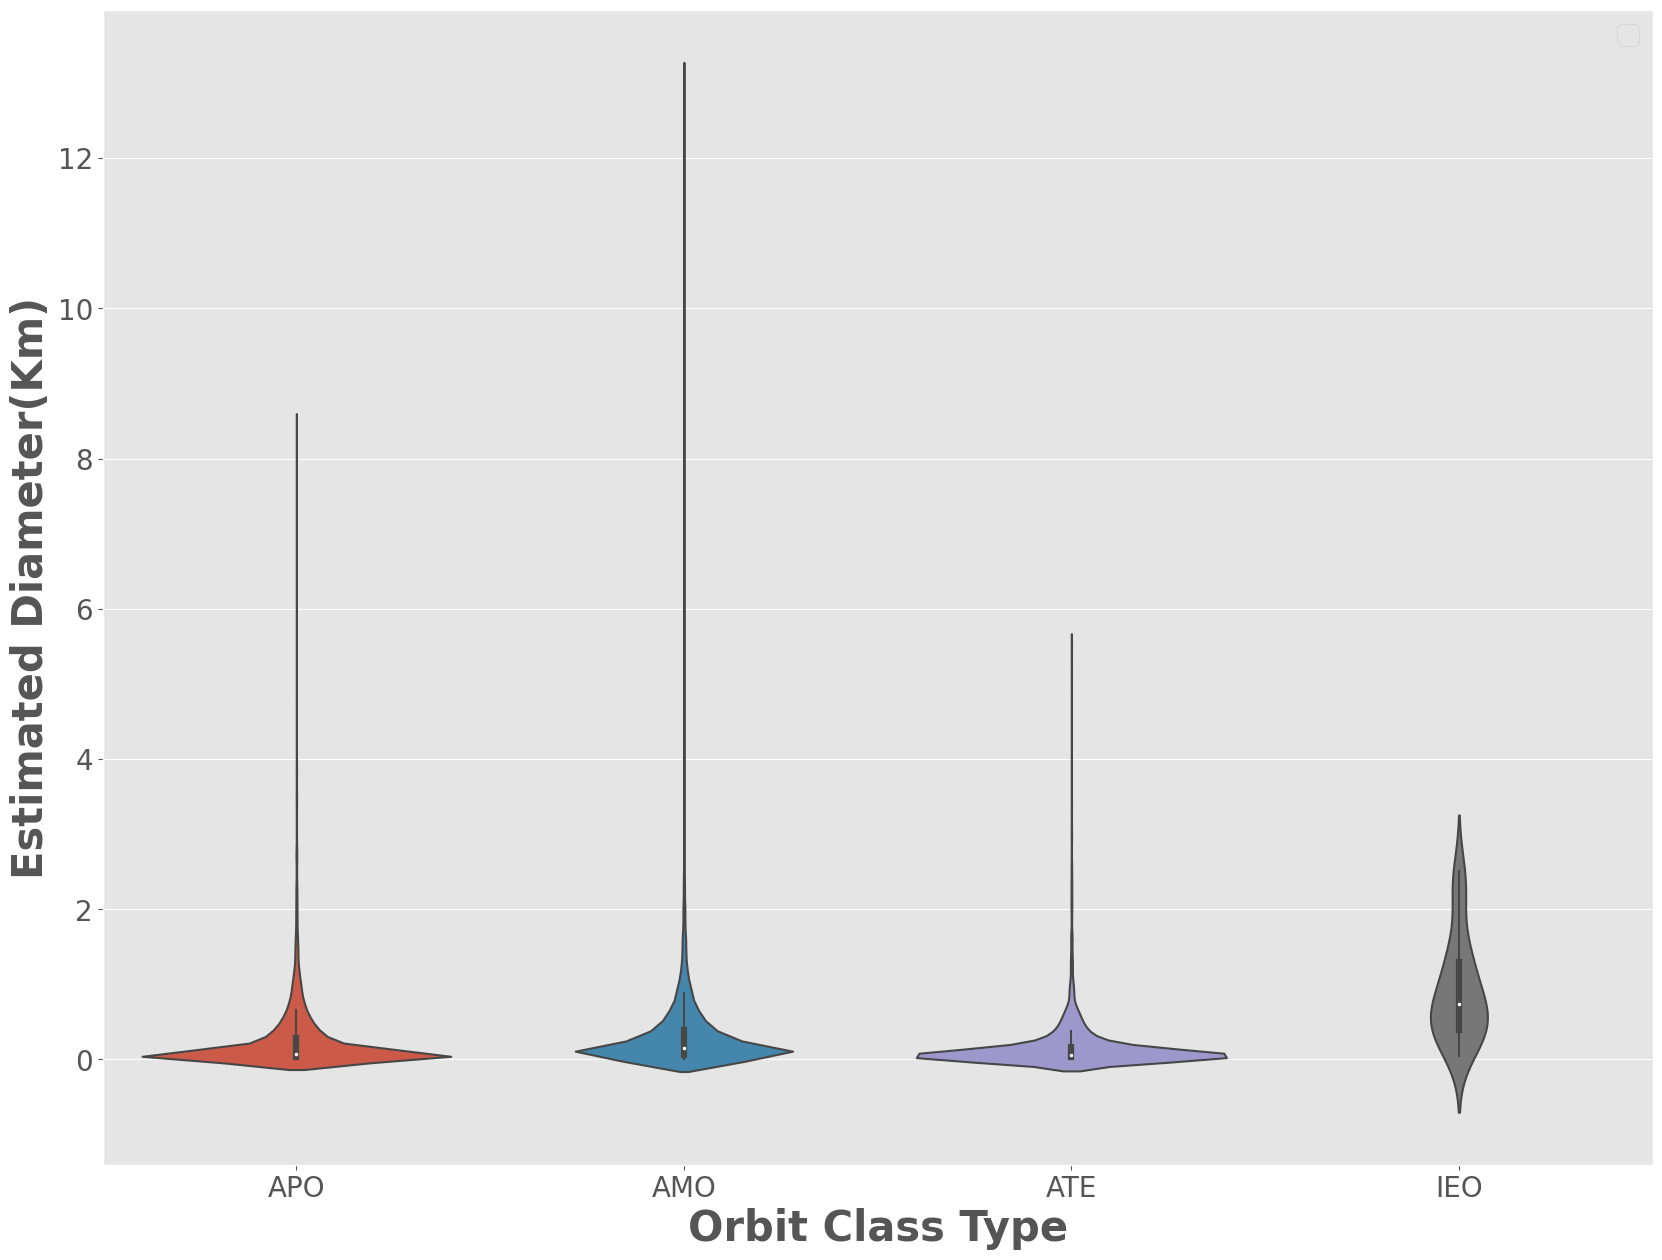

In [ ]:
import matplotlib
plt.style.use("ggplot")
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

sb.violinplot(data=data, x='orbit_class_type', y='mean_esitmated_diameter(Km)')
plt.xlabel("Orbit Class Type", fontsize=30, fontweight='bold')
plt.ylabel("Estimated Diameter(Km)", fontsize=30, fontweight='bold')
plt.legend(fontsize=20)
plt.show()

In [ ]:
df_3 = data[['mean_esitmated_diameter(Km)', 'orbit_class_type']]
df_3

,mean_esitmated_diameter(Km),orbit_class_type
0,3.886356,APO
1,2.751330,AMO
2,2.299019,AMO
3,1.635094,ATE
4,1.505021,APO
...,...,...
23994,0.017928,APO
23995,0.011312,APO
23996,0.015615,APO
23997,0.014708,AMO


In [ ]:
df_3.columns = ['Median Diameter(Km)', 'Orbit Class Type']
median_table = pd.pivot_table(data=df_3, columns="Orbit Class Type", values="Median Diameter(Km)", aggfunc='median')
df_3.columns = ['mean_esitmated_diameter(Km)', 'orbit_class_type']
median_table


Orbit Class Type,AMO,APO,ATE,IEO
Median Diameter(Km),0.154008,0.07826,0.056695,0.744587


In [ ]:
g1 = df_3[df_3['orbit_class_type'] == 'APO']
g2 = df_3[df_3['orbit_class_type'] == 'AMO']
g3 = df_3[df_3['orbit_class_type'] == 'ATE']
g4 = df_3[df_3['orbit_class_type'] == 'IEO']


st.kruskal(g1['mean_esitmated_diameter(Km)'], g2['mean_esitmated_diameter(Km)'], g3['mean_esitmated_diameter(Km)'], g4['mean_esitmated_diameter(Km)'])

KruskalResult(statistic=1245.9388952335435, pvalue=7.903930056024147e-270)

Performing the Kruskal-Wallis test on the median asteroid diameter across different orbit classes gives me statistical evidence that the median diameters of the classes are significantly different

**Null hypothesis**: significantly different

**Alternate hypothesis**: not significantly different

In [ ]:
mean_table = pd.pivot_table(data=df_3, columns="orbit_class_type", values="mean_esitmated_diameter(Km)", aggfunc='mean')
mean_table

orbit_class_type,AMO,APO,ATE,IEO
mean_esitmated_diameter(Km),0.327991,0.246228,0.169503,0.921174


In [ ]:
st.f_oneway(g1['mean_esitmated_diameter(Km)'], g2['mean_esitmated_diameter(Km)'], g3['mean_esitmated_diameter(Km)'], g4['mean_esitmated_diameter(Km)'])

F_onewayResult(statistic=97.56389883131175, pvalue=9.152871804253547e-63)

In [ ]:
st.f_oneway(np.log(g1['mean_esitmated_diameter(Km)']), np.log(g2['mean_esitmated_diameter(Km)']), np.log(g3['mean_esitmated_diameter(Km)']), np.log(g4['mean_esitmated_diameter(Km)']))

F_onewayResult(statistic=425.20617903962733, pvalue=3.6561276295318406e-269)

Performing One-Way ANOVA also gives me evidence that the mean diamters of different classes are dfferent. but due to to skewness in data, these seem to be quite unreliable.

### **Asteroid Orbit class type and their distances comparision**

**Perhilion Distance vs Orbit Class Type**

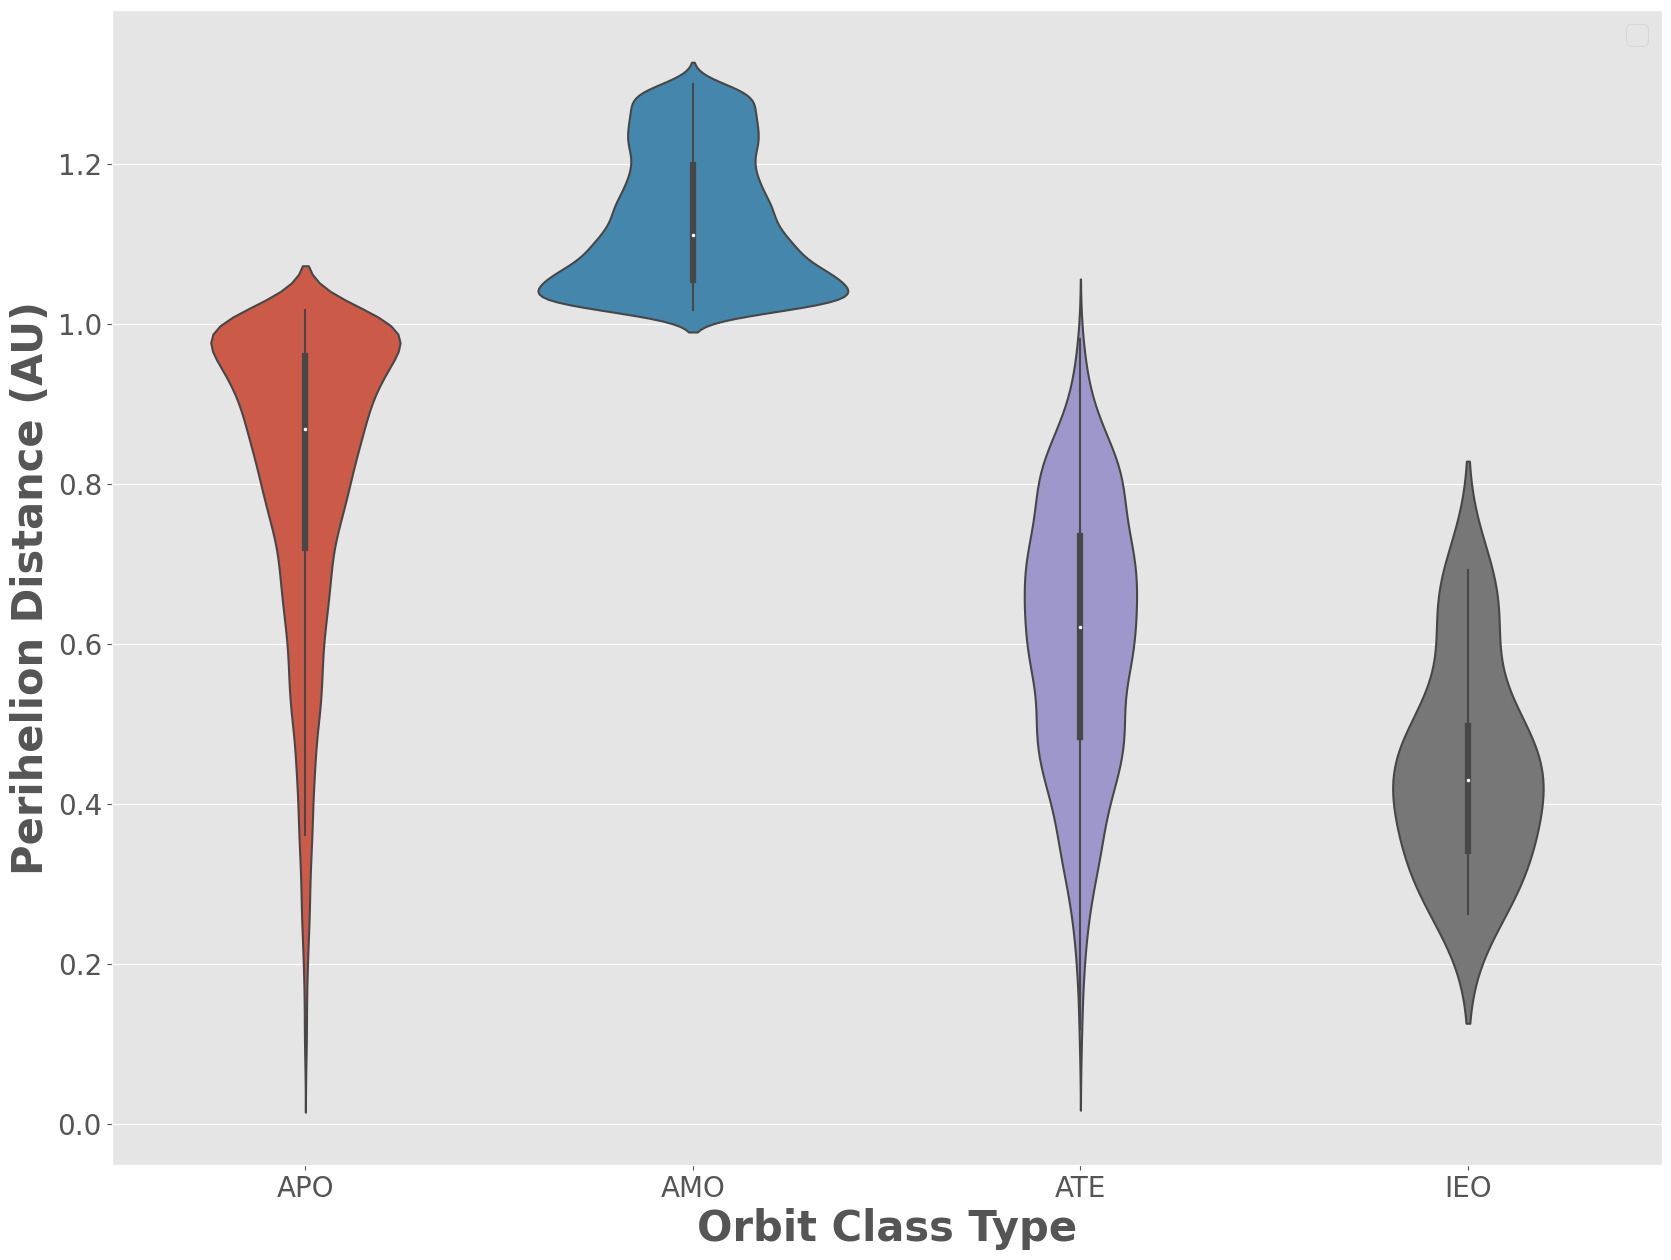

In [ ]:
import matplotlib
plt.style.use("ggplot")
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

sb.violinplot(data=data, x='orbit_class_type', y='perihelion_distance')
plt.xlabel("Orbit Class Type", fontsize=30, fontweight='bold')
plt.ylabel("Perihelion Distance (AU)", fontsize=30, fontweight='bold')
plt.legend(fontsize=20)
plt.show()

Looking at the violin plot I can deduce:

*   **Perhilion Distance : AMO > APO > ATE > IEO**
*   **The AMO class seems to exist after 1 AU**



In [ ]:
df_4 = data[['perihelion_distance', 'orbit_class_type']]
df_4.columns = ['Median Perihelion Distance', 'Orbit Class Type']
df_4.head()

,Median Perihelion Distance,Orbit Class Type
0,0.621512,APO
1,1.238537,AMO
2,1.050403,AMO
3,0.790185,ATE
4,0.701397,APO


In [ ]:
mean_table_dist = pd.pivot_table(data=df_4, columns="Orbit Class Type", values="Median Perihelion Distance", aggfunc='median')
mean_table_dist

Orbit Class Type,AMO,APO,ATE,IEO
Median Perihelion Distance,1.111453,0.869005,0.620669,0.42959


*   Over here we can see how the average perihelion distance of each orbit class varies.
*   Using One Way ANOVA and Kruskal-Wallis test we can easily verify that the means and medians of each group differ significantly.
*   This means that Perihelion distance is definitely a factor in determining orbit class type.






In [ ]:
df_4.columns = ['perihelion_distance', 'orbit_class_type']
g11 = df_4[df_4['orbit_class_type'] == 'APO']
g22 = df_4[df_4['orbit_class_type'] == 'AMO']
g33 = df_4[df_4['orbit_class_type'] == 'ATE']
g44 = df_4[df_4['orbit_class_type'] == 'IEO']

In [ ]:
st.kruskal(g11['perihelion_distance'], g22['perihelion_distance'], g33['perihelion_distance'], g44['perihelion_distance'])

KruskalResult(statistic=17540.719289414148, pvalue=0.0)

In [ ]:
st.f_oneway(g11['perihelion_distance'], g22['perihelion_distance'], g33['perihelion_distance'], g44['perihelion_distance'])

F_onewayResult(statistic=10058.99076875025, pvalue=0.0)

In [ ]:
st.f_oneway(np.log(g11['perihelion_distance']), np.log(g22['perihelion_distance']), np.log(g33['perihelion_distance']), np.log(g44['perihelion_distance']))

F_onewayResult(statistic=5647.538524021279, pvalue=0.0)

**Aphelion Distance vs Orbit Class Type**

In [ ]:
sb.boxplot(data=data, x='orbit_class_type', y='aphelion_distance', showfliers=False)
plt.xlabel("Orbit Class Type", fontsize=30)
plt.ylabel("Aphelion Distance (AU)", fontsize=30)
plt.show()

### **Asteroid and Class Types Time Series Analyis**

In [ ]:
df_5 = data[['first_observation_year', 'orbit_class_type']]
df_5['class_type'] = df_5['orbit_class_type']
df_5

<ipython-input-17-ec8224a44221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['class_type'] = df_5['orbit_class_type']


,first_observation_year,orbit_class_type,class_type
0,1973,APO,APO
1,1963,AMO,AMO
2,1960,AMO,AMO
3,1955,ATE,ATE
4,1977,APO,APO
...,...,...,...
23994,2020,APO,APO
23995,2020,APO,APO
23996,2020,APO,APO
23997,2020,AMO,AMO


In [ ]:
count_table_year = pd.pivot_table(data=df_5, index='first_observation_year', columns="class_type", values="orbit_class_type", aggfunc='count')
count_table_year

class_type,AMO,APO,ATE,IEO
first_observation_year,,,,
1931,NaN,1.0,NaN,NaN
1934,1.0,1.0,NaN,NaN
1936,NaN,1.0,NaN,NaN
1937,1.0,2.0,NaN,NaN
1949,NaN,1.0,NaN,NaN
...,...,...,...,...
2016,679.0,1004.0,140.0,1.0
2017,642.0,1125.0,161.0,1.0
2018,556.0,1011.0,144.0,1.0


In [ ]:
count_table_year = count_table_year.fillna(0)
count_table_year

class_type,AMO,APO,ATE,IEO
first_observation_year,,,,
1931,0.0,1.0,0.0,0.0
1934,1.0,1.0,0.0,0.0
1936,0.0,1.0,0.0,0.0
1937,1.0,2.0,0.0,0.0
1949,0.0,1.0,0.0,0.0
...,...,...,...,...
2016,679.0,1004.0,140.0,1.0
2017,642.0,1125.0,161.0,1.0
2018,556.0,1011.0,144.0,1.0


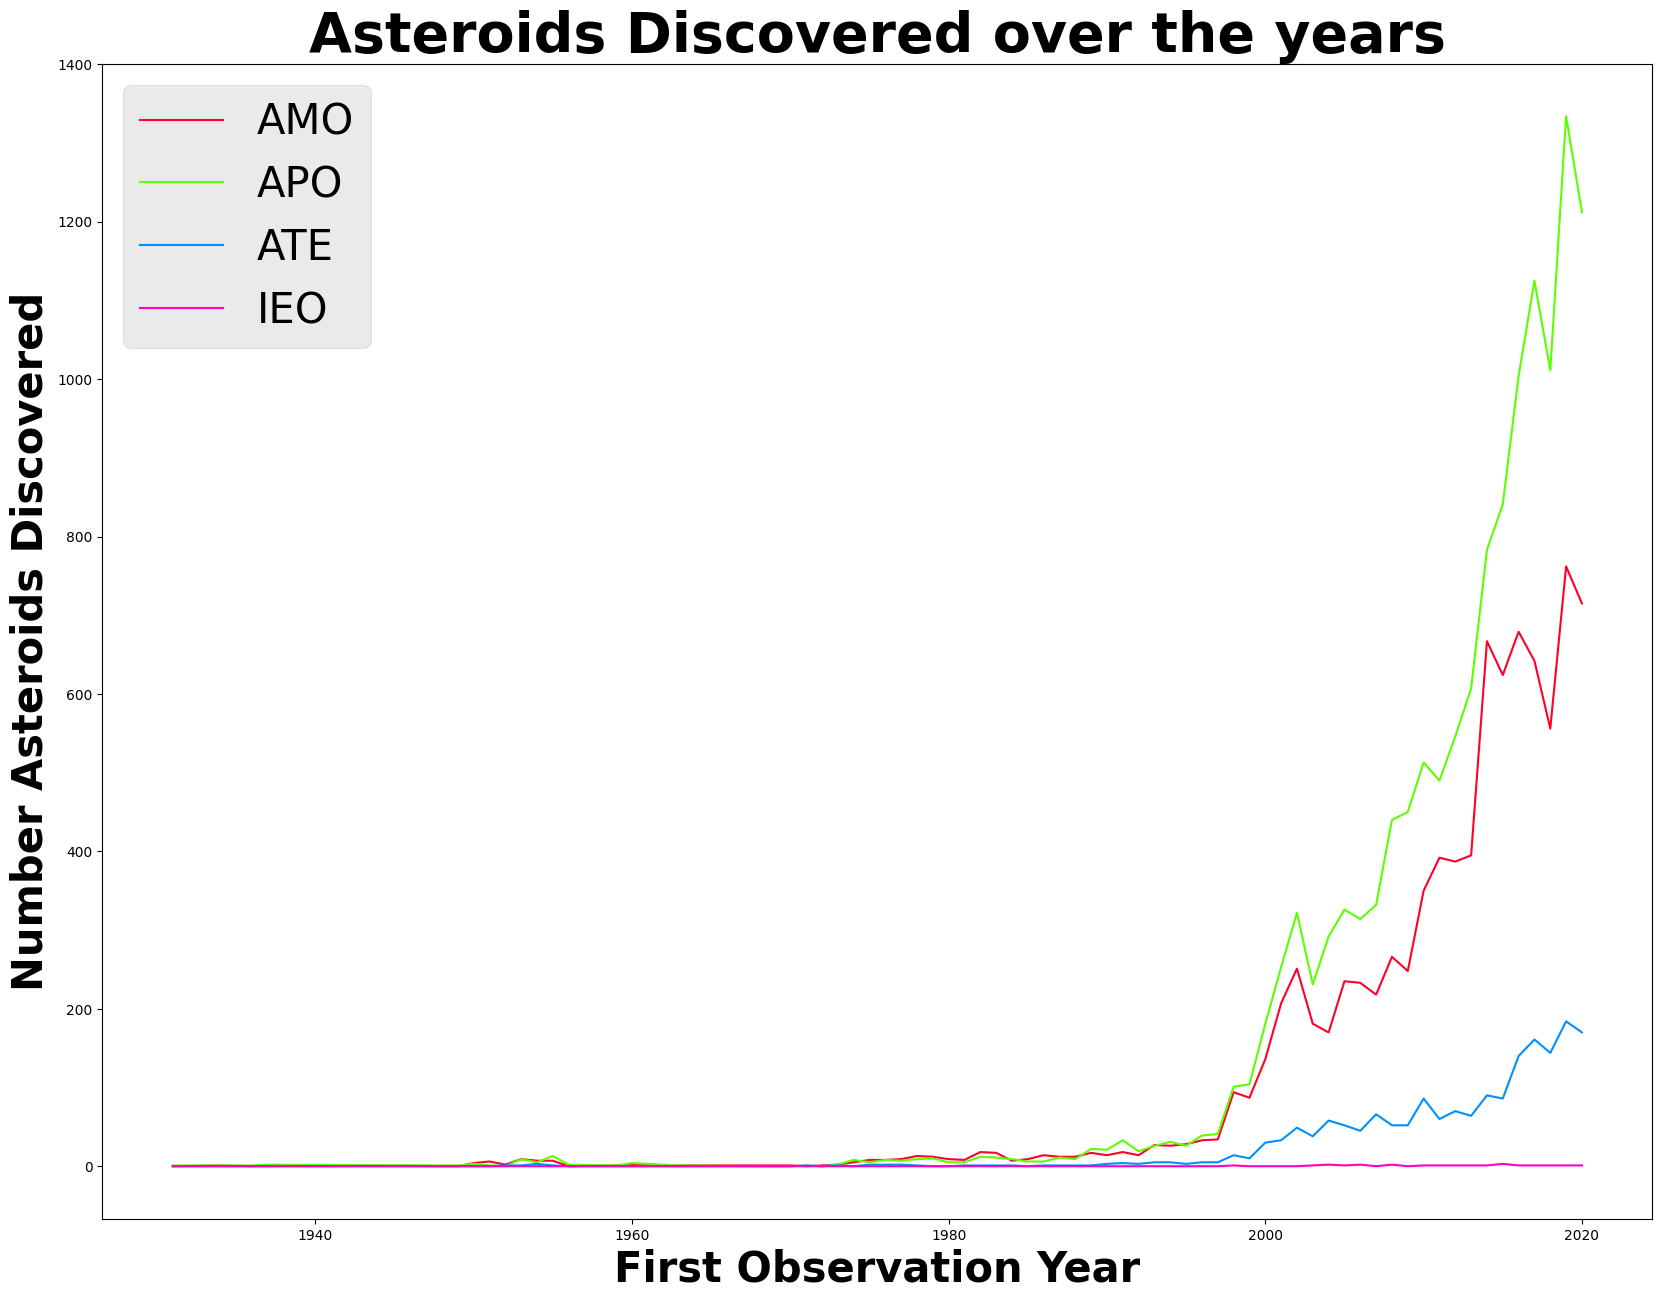

In [ ]:
count_table_year.plot(colormap='gist_rainbow')
plt.style.use("ggplot")
plt.xlabel("First Observation Year", fontsize=30, fontweight='bold')
plt.ylabel("Number Asteroids Discovered", fontsize=30, fontweight='bold')
plt.title("Asteroids Discovered over the years", fontweight='bold', fontsize=40)
plt.legend(fontsize=30)
plt.show()

*   Most of the asteroids were discovered in recent years.
*   APO > AMO > ATE > IEO



In [ ]:
df_6 = data[['last_observation_year', 'orbit_class_type']]
df_6['class_type'] = df_6['orbit_class_type']

count_table_year_2 = pd.pivot_table(data=df_6, index='last_observation_year', columns="class_type", values="orbit_class_type", aggfunc='count')

count_table_year_2 = count_table_year_2.fillna(0)

count_table_year_2

<ipython-input-21-466da7982bc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6['class_type'] = df_6['orbit_class_type']


class_type,AMO,APO,ATE,IEO
last_observation_year,,,,
1979,0.0,1.0,0.0,0.0
1990,0.0,1.0,0.0,0.0
1991,1.0,5.0,0.0,0.0
1992,0.0,3.0,0.0,0.0
1993,2.0,5.0,1.0,0.0
1994,3.0,9.0,0.0,0.0
1995,7.0,5.0,0.0,0.0
1996,4.0,5.0,2.0,0.0
1997,3.0,8.0,0.0,0.0


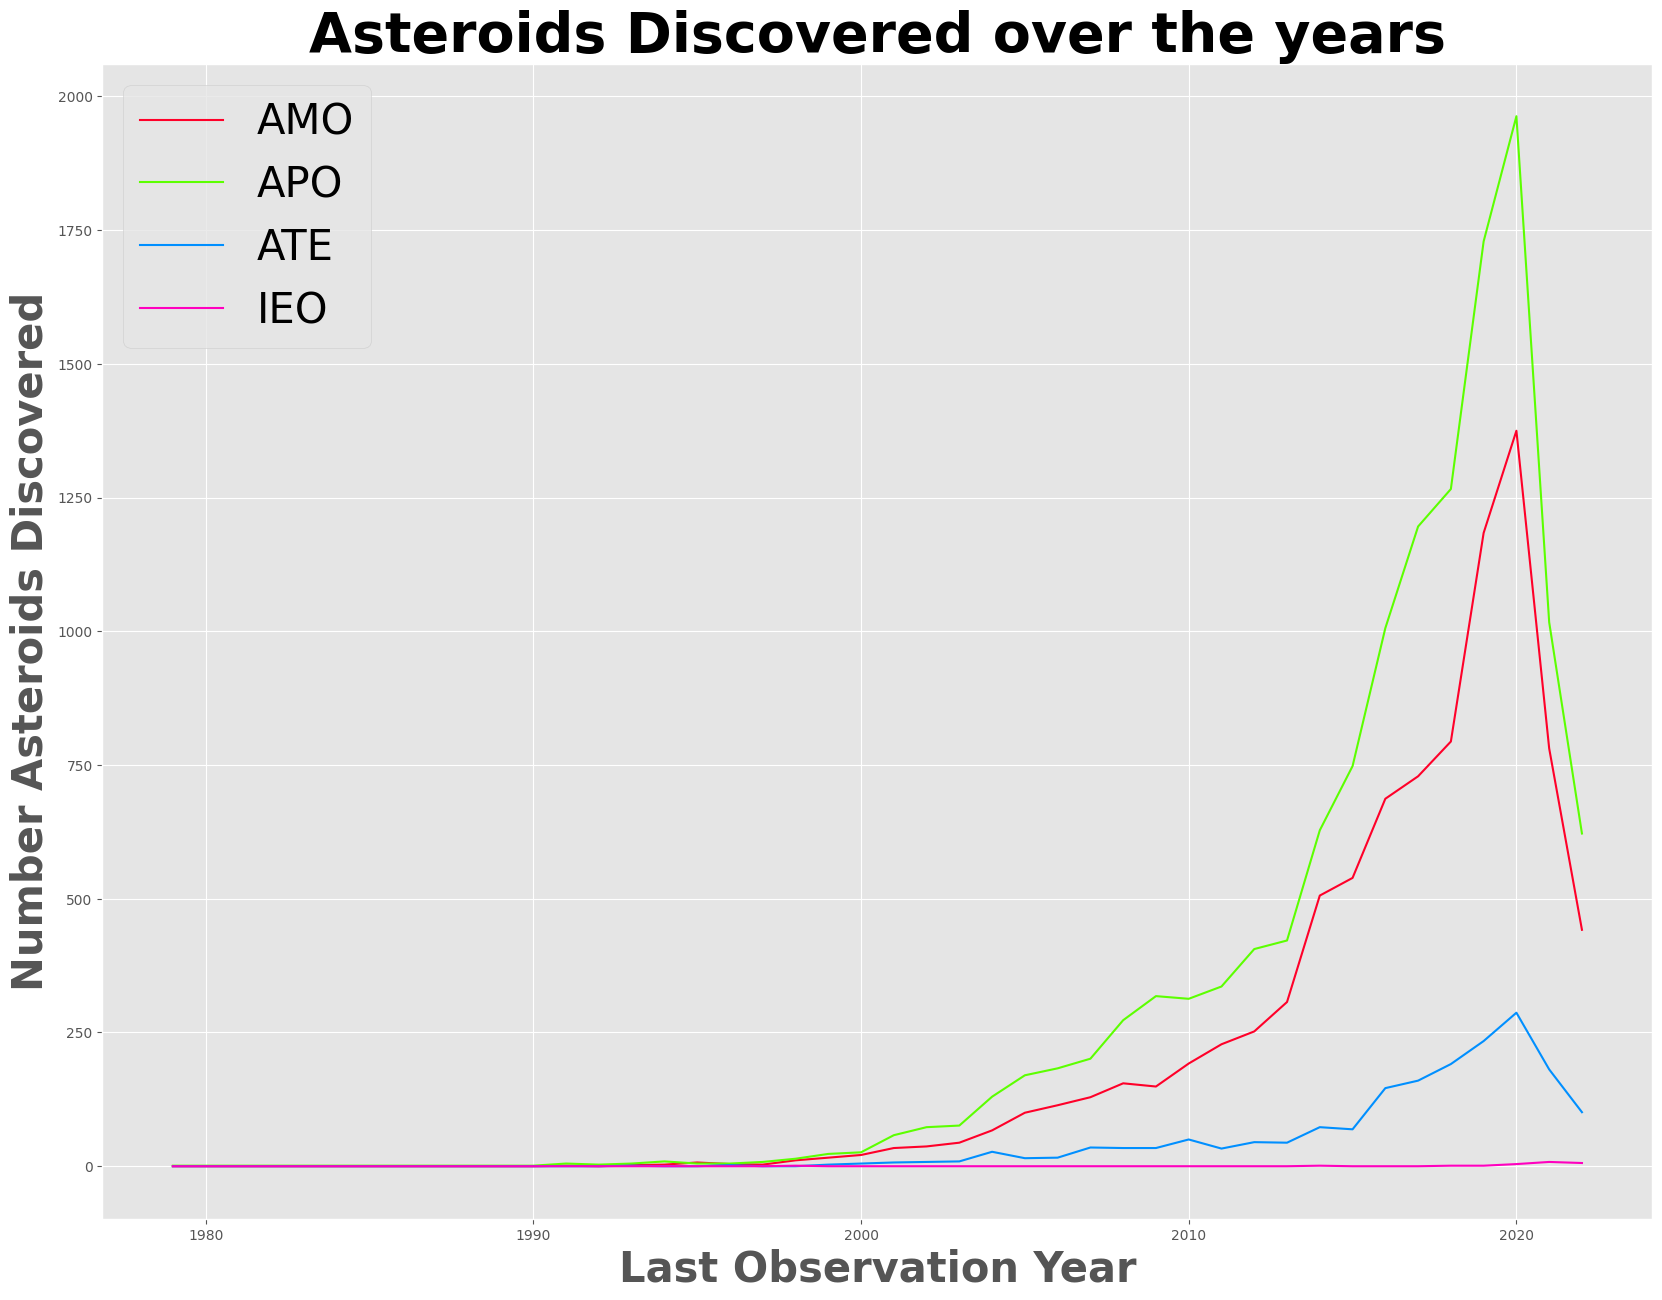

In [ ]:
count_table_year_2.plot(colormap='gist_rainbow')
plt.xlabel("Last Observation Year", fontsize=30, fontweight='bold')
plt.ylabel("Number Asteroids Discovered", fontsize=30, fontweight='bold')
plt.title("Asteroids Discovered over the years", fontweight='bold', fontsize=40)
plt.legend(fontsize=30)
plt.show()

**Is_Hazardous vs Observation Period**

In [ ]:
df_7 = data[['first_observation_year', 'last_observation_year', 'is_potentially_hazardous_asteroid']]
df_7['Observation Period(years)'] = np.abs(df_7['last_observation_year']-df_7['first_observation_year'])
df_7 = df_7[['Observation Period(years)', 'is_potentially_hazardous_asteroid']]

<ipython-input-23-39f70679148b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7['Observation Period(years)'] = np.abs(df_7['last_observation_year']-df_7['first_observation_year'])


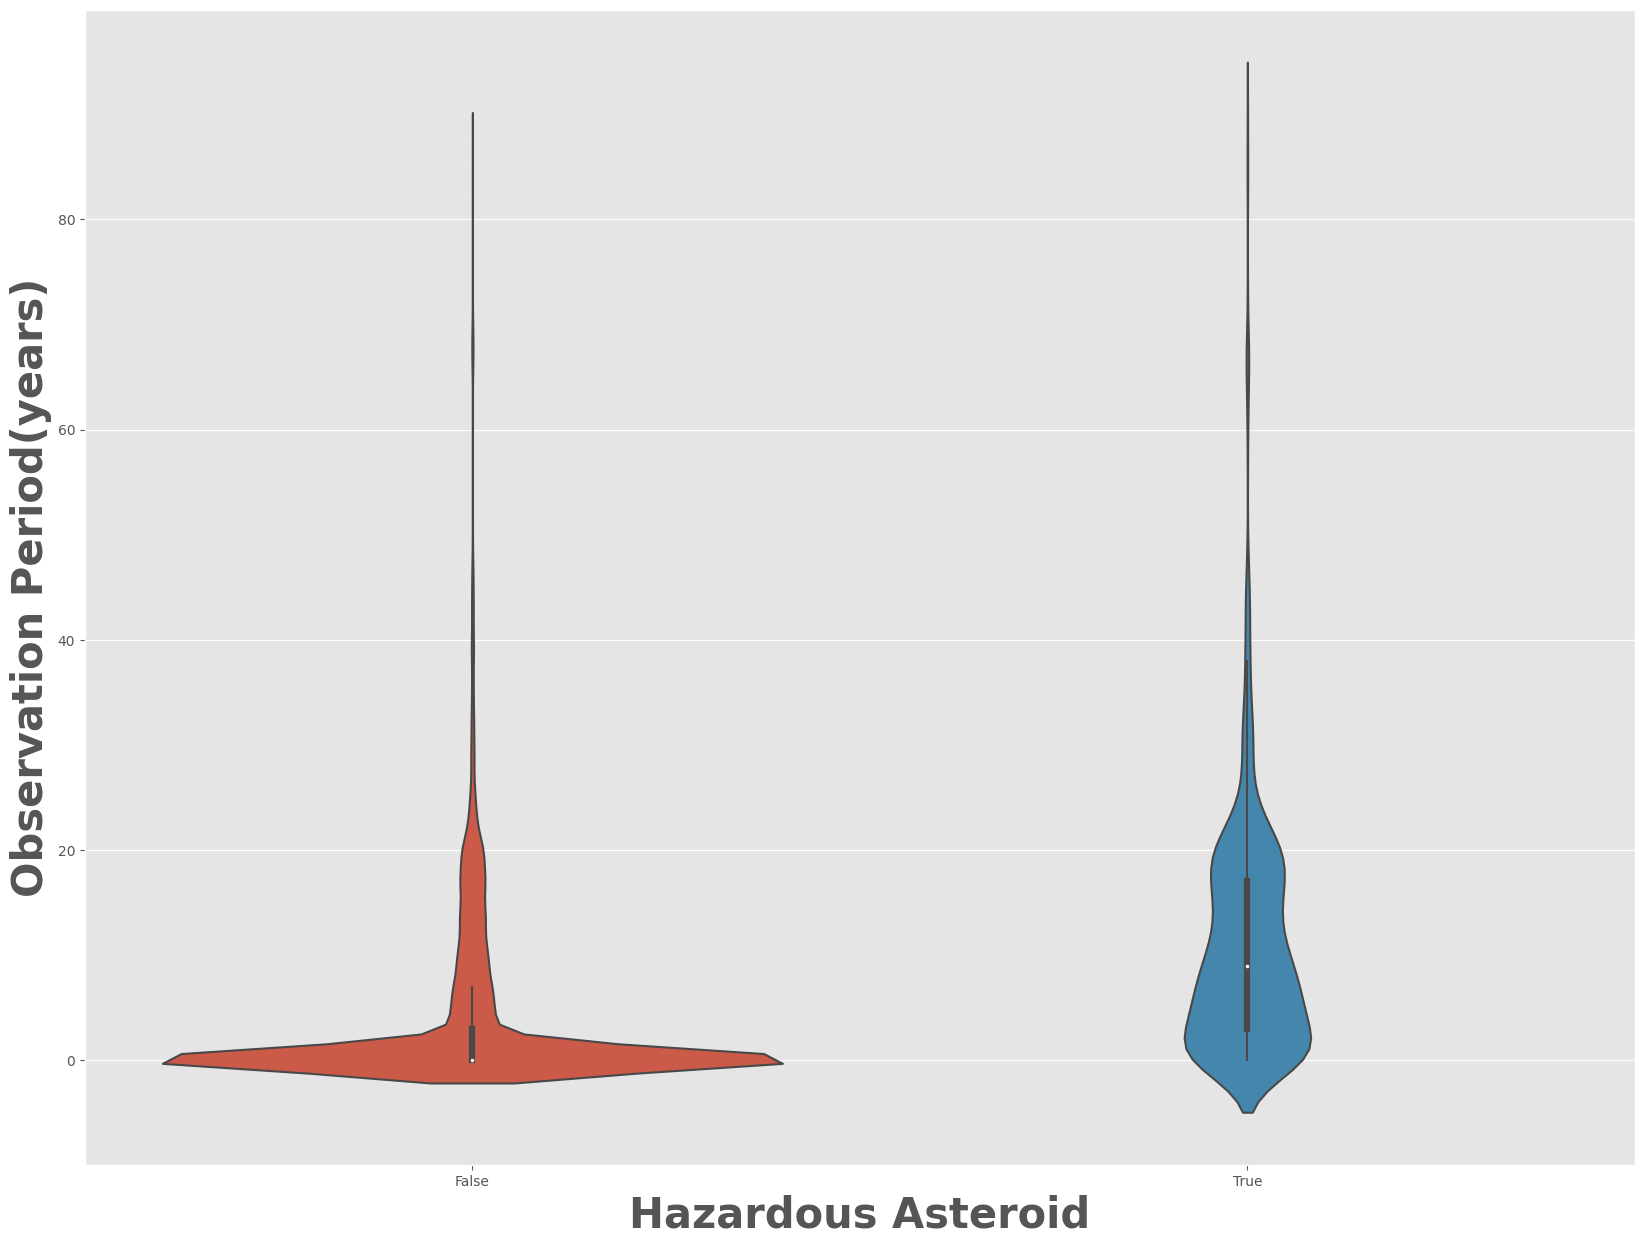

In [ ]:
sb.violinplot(data=df_7, y='Observation Period(years)', x='is_potentially_hazardous_asteroid')
plt.ylabel("Observation Period(years)", fontsize=30, fontweight='bold')
plt.xlabel("Hazardous Asteroid", fontsize=30, fontweight='bold')
plt.show()

*   **Hazardous Asteroids have a higher average observation period**




In [ ]:
grp1 = df_7[df_7['is_potentially_hazardous_asteroid'] == True]
grp2 = df_7[df_7['is_potentially_hazardous_asteroid'] == False]

print(grp1.var())
print(grp2.var())
print("*************************************")
print(grp1.mean())
print(grp2.mean())
print("*************************************")
print(grp1.median())
print(grp2.median())

Observation Period(years)            131.071393
is_potentially_hazardous_asteroid      0.000000
dtype: float64
Observation Period(years)            64.49877
is_potentially_hazardous_asteroid     0.00000
dtype: float64
*************************************
Observation Period(years)            11.223602
is_potentially_hazardous_asteroid     1.000000
dtype: float64
Observation Period(years)            3.704856
is_potentially_hazardous_asteroid    0.000000
dtype: float64
*************************************
Observation Period(years)            9.0
is_potentially_hazardous_asteroid    1.0
dtype: float64
Observation Period(years)            0.0
is_potentially_hazardous_asteroid    0.0
dtype: float64


In [ ]:
st.levene(grp1['Observation Period(years)'], grp2['Observation Period(years)'])

LeveneResult(statistic=567.7254548934878, pvalue=4.850027679270583e-124)

In [ ]:
st.ttest_ind(grp1['Observation Period(years)'], grp2['Observation Period(years)'], equal_var=False, alternative='greater')

Ttest_indResult(statistic=29.362476038358707, pvalue=1.896361467726539e-161)

### **Sentry objects characteristics**

*   **Analyzing Data to see what classifies as a sentry object.**




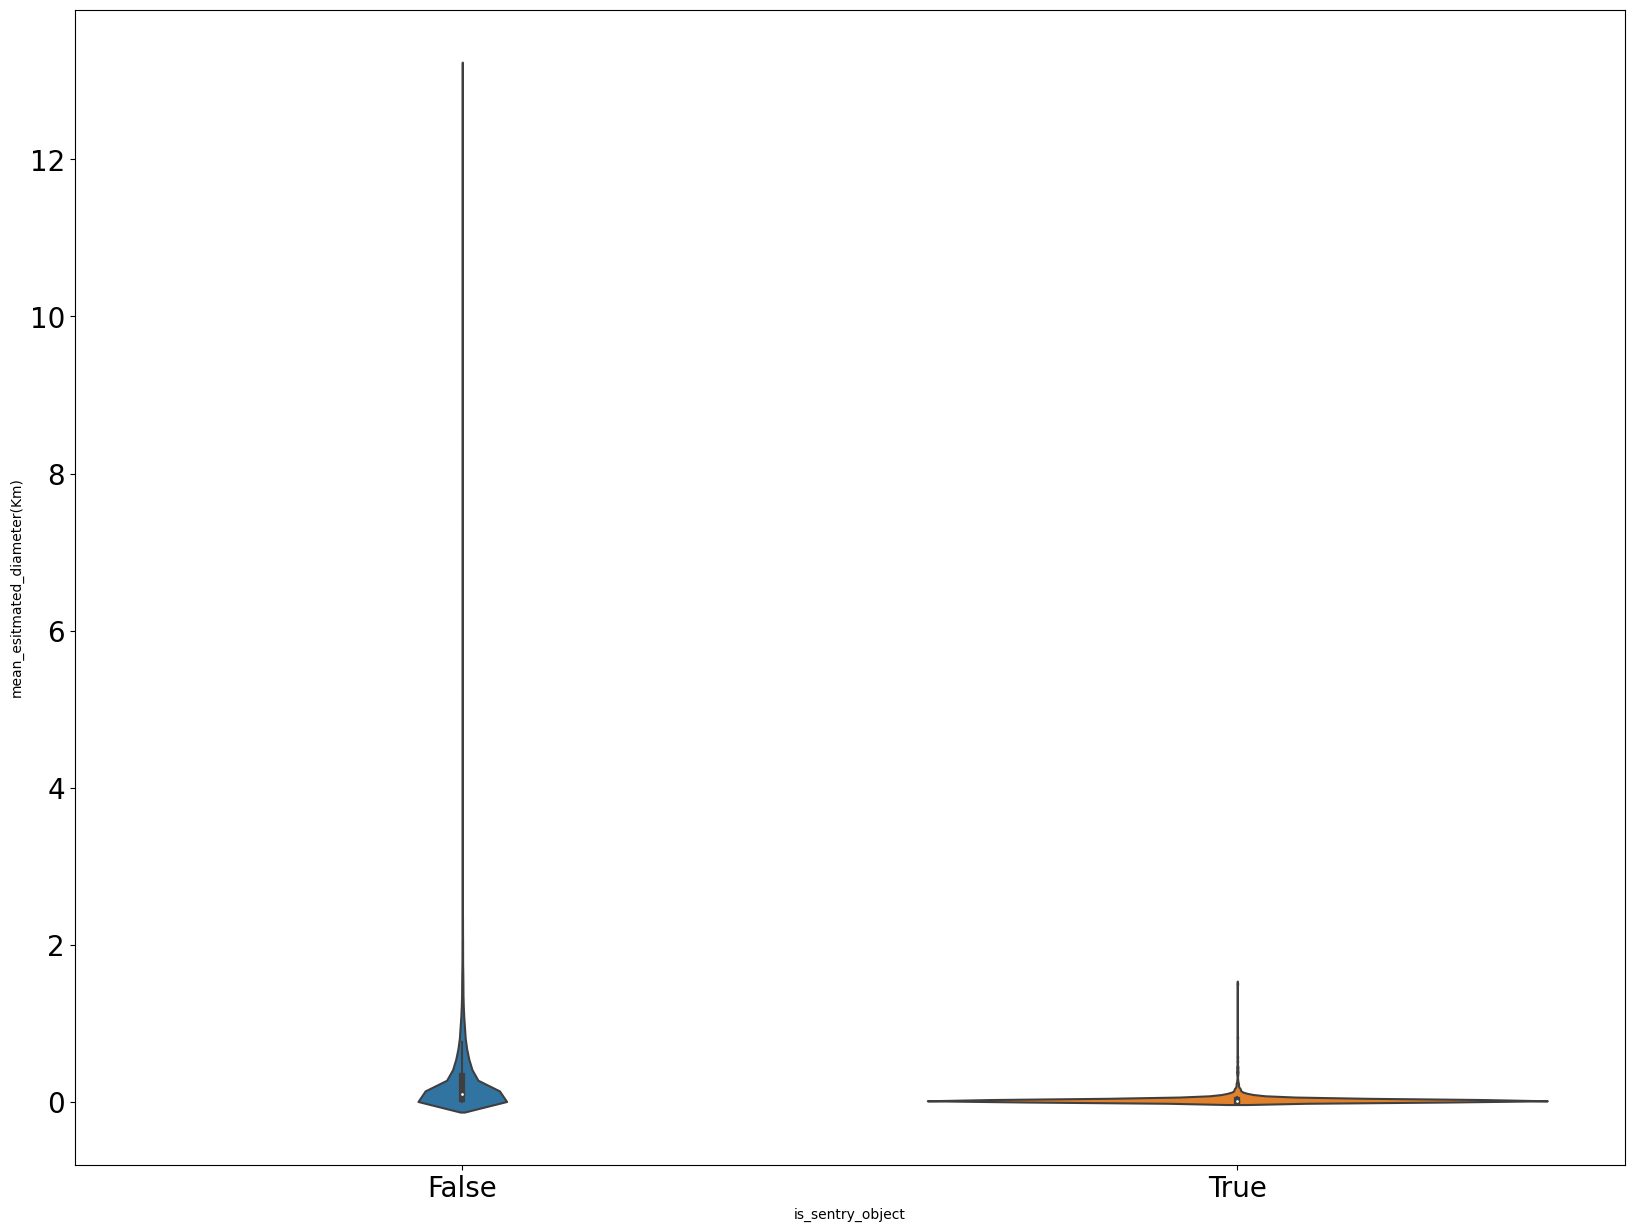

In [ ]:
sb.violinplot(data=data, y='mean_esitmated_diameter(Km)', x='is_sentry_object')
plt.show()

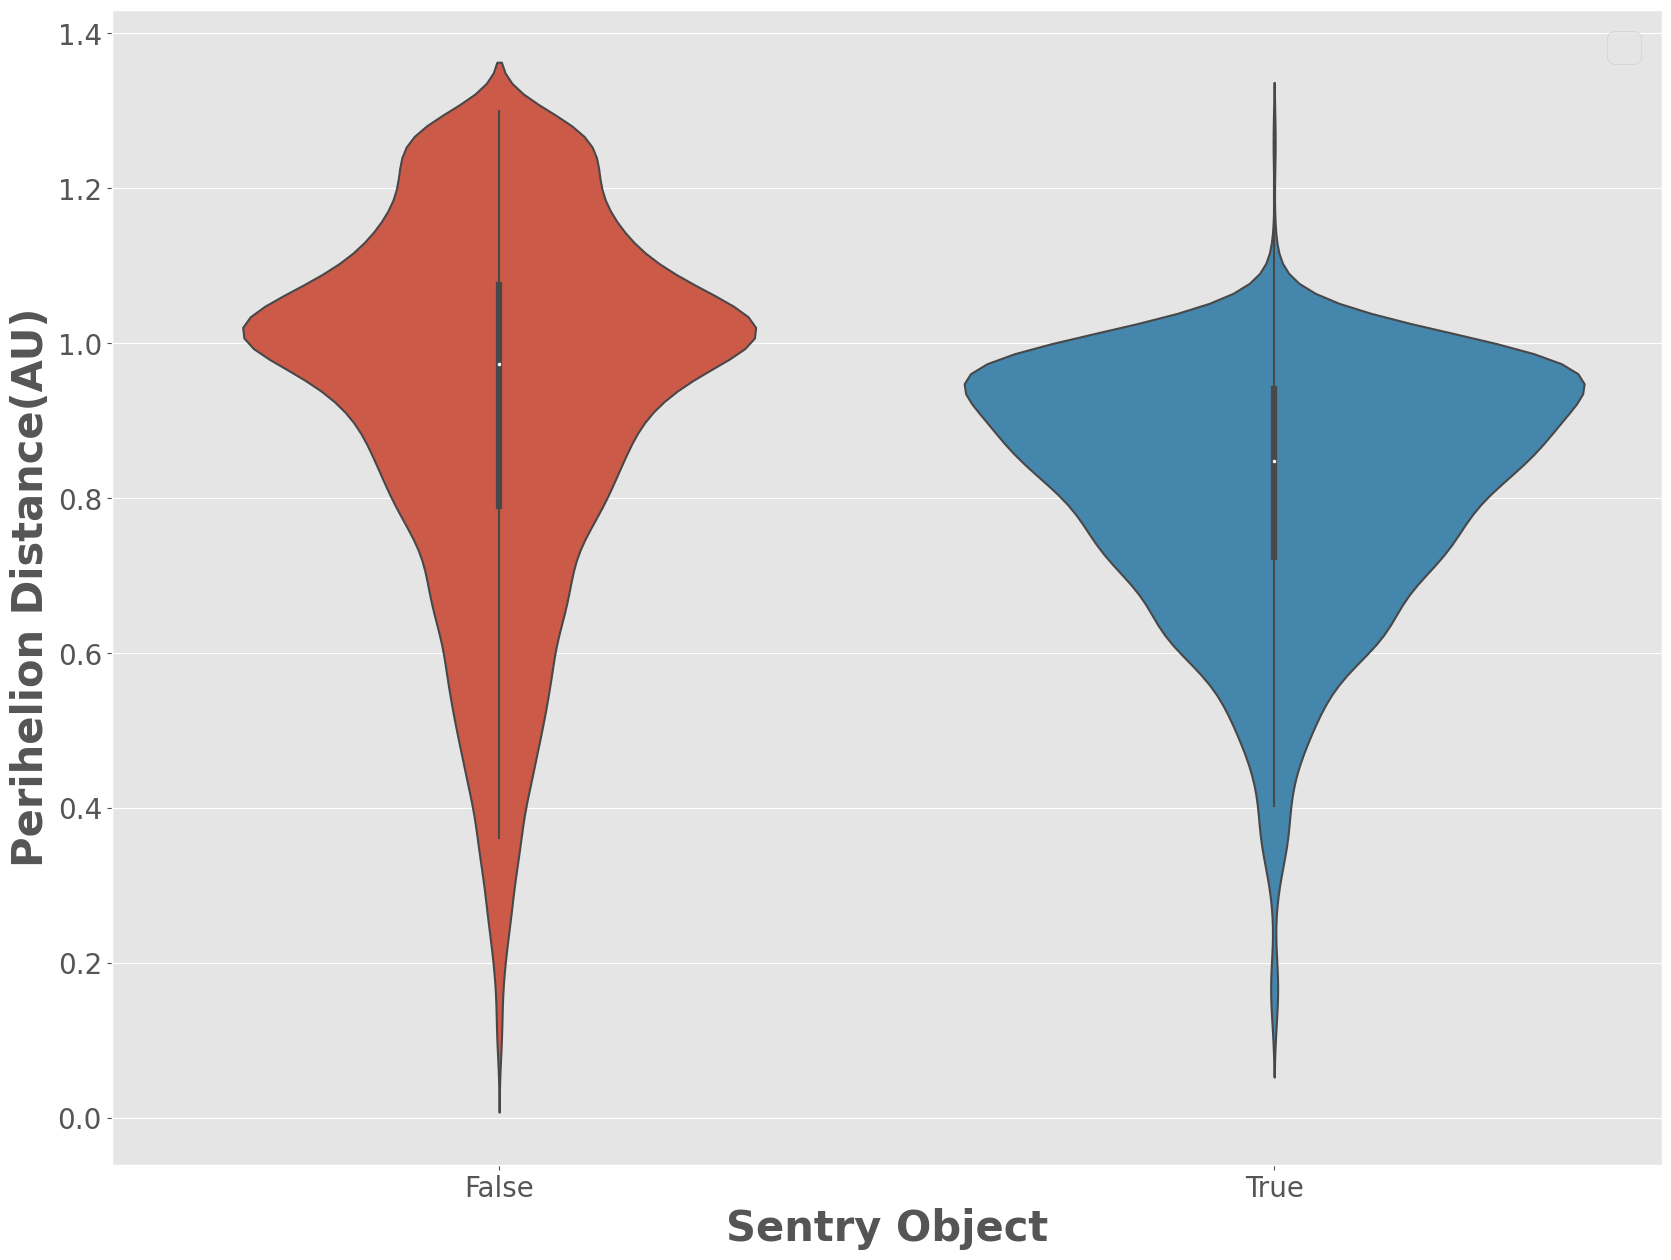

In [ ]:
sb.violinplot(data=data, y='perihelion_distance', x='is_sentry_object')
plt.ylabel("Perihelion Distance(AU)", fontsize=30, fontweight='bold')
plt.xlabel("Sentry Object", fontsize=30, fontweight='bold')
plt.legend(fontsize=30)
plt.show()

In [ ]:
data[data['is_sentry_object'] == True].absolute_magnitude_h.median()

26.9

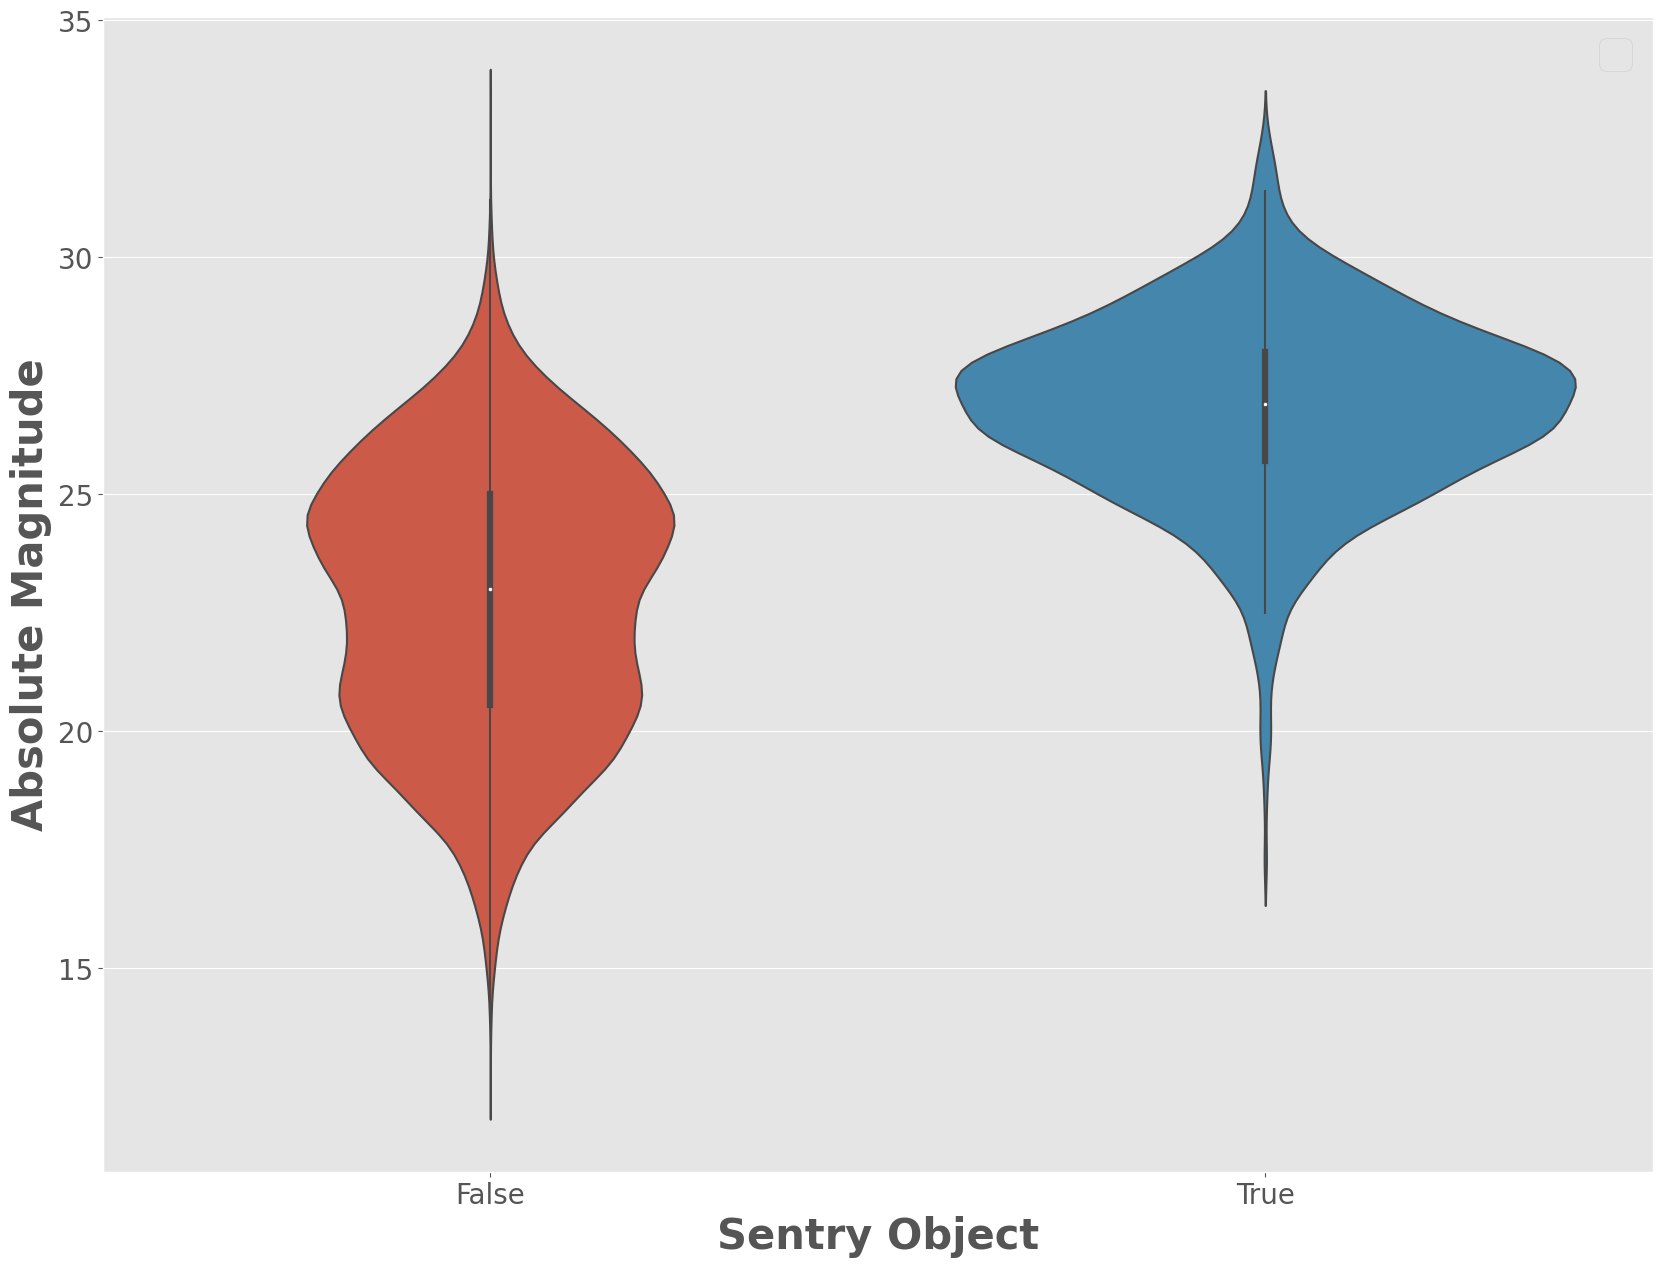

In [ ]:
sb.violinplot(data=data, y='absolute_magnitude_h', x='is_sentry_object')
plt.ylabel("Absolute Magnitude", fontsize=30, fontweight='bold')
plt.xlabel("Sentry Object", fontsize=30, fontweight='bold')
plt.legend(fontsize=30)
plt.show()